In [1]:
#import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as stats

#file locations
#data file
csv_file_2016 ="CENSUS_and_POPULATION_FINAL_2016.csv"

csv_file_2016_2 = "../../../Resources/FOR_JINHO_2016.csv"


##NOTES###
#this dataset doesn't include Alaska,all counties were removed bc county names didn't match**
##Lousiana, also**
##It DOES include DC, and counts it as a state**





In [2]:
#read CSV files
analysis_data_2016= pd.read_csv(csv_file_2016)
analysis_data_2016

analysis_data_2016_2 = pd.read_csv(csv_file_2016_2)
analysis_data_2016

,Location,State_Code_x,County,State,State_Code_y,Party,Candidate,Total_Votes,County_Pop_2016
0,"Alabama, Autauga",AL,Autauga,Alabama,AL,democrat,Hillary Clinton,24973,"55,243"
1,"Alabama, Autauga",AL,Autauga,Alabama,AL,republican,Donald Trump,24973,"55,243"
2,"Alabama, Baldwin",AL,Baldwin,Alabama,AL,democrat,Hillary Clinton,95215,"207,601"
3,"Alabama, Baldwin",AL,Baldwin,Alabama,AL,republican,Donald Trump,95215,"207,601"
4,"Alabama, Barbour",AL,Barbour,Alabama,AL,democrat,Hillary Clinton,10469,"25,806"
...,...,...,...,...,...,...,...,...,...
5989,"Wyoming, Uinta",WY,Uinta,Wyoming,WY,republican,Donald Trump,8470,"20,682"
5990,"Wyoming, Washakie",WY,Washakie,Wyoming,WY,democrat,Hillary Clinton,3814,"8,165"
5991,"Wyoming, Washakie",WY,Washakie,Wyoming,WY,republican,Donald Trump,3814,"8,165"
5992,"Wyoming, Weston",WY,Weston,Wyoming,WY,democrat,Hillary Clinton,3526,"7,220"


In [3]:
#removing commas from County Population Data
analysis_data_2016["County_Pop_2016"] = analysis_data_2016["County_Pop_2016"].str.replace(",","").astype(float)


In [4]:
analysis_data_2016["Avg_Turnout"] = (analysis_data_2016.Total_Votes / analysis_data_2016.County_Pop_2016)
analysis_data_2016

,Location,State_Code_x,County,State,State_Code_y,Party,Candidate,Total_Votes,County_Pop_2016,Avg_Turnout
0,"Alabama, Autauga",AL,Autauga,Alabama,AL,democrat,Hillary Clinton,24973,55243.0,0.452057
1,"Alabama, Autauga",AL,Autauga,Alabama,AL,republican,Donald Trump,24973,55243.0,0.452057
2,"Alabama, Baldwin",AL,Baldwin,Alabama,AL,democrat,Hillary Clinton,95215,207601.0,0.458644
3,"Alabama, Baldwin",AL,Baldwin,Alabama,AL,republican,Donald Trump,95215,207601.0,0.458644
4,"Alabama, Barbour",AL,Barbour,Alabama,AL,democrat,Hillary Clinton,10469,25806.0,0.405681
...,...,...,...,...,...,...,...,...,...,...
5989,"Wyoming, Uinta",WY,Uinta,Wyoming,WY,republican,Donald Trump,8470,20682.0,0.409535
5990,"Wyoming, Washakie",WY,Washakie,Wyoming,WY,democrat,Hillary Clinton,3814,8165.0,0.467116
5991,"Wyoming, Washakie",WY,Washakie,Wyoming,WY,republican,Donald Trump,3814,8165.0,0.467116
5992,"Wyoming, Weston",WY,Weston,Wyoming,WY,democrat,Hillary Clinton,3526,7220.0,0.488366


In [5]:
# 1. What is the overall average voter turnout for 2004 per (((state))), and per county
State_Avg_Turnout = round((analysis_data_2016.groupby('State')['Avg_Turnout'].mean() * 100), 2)

State_Avg_Voter_Turnout = pd.DataFrame(State_Avg_Turnout)
State_Avg_Voter_Turnout_1 = State_Avg_Voter_Turnout.reset_index()
#State_Avg_Voter_Turnout_1


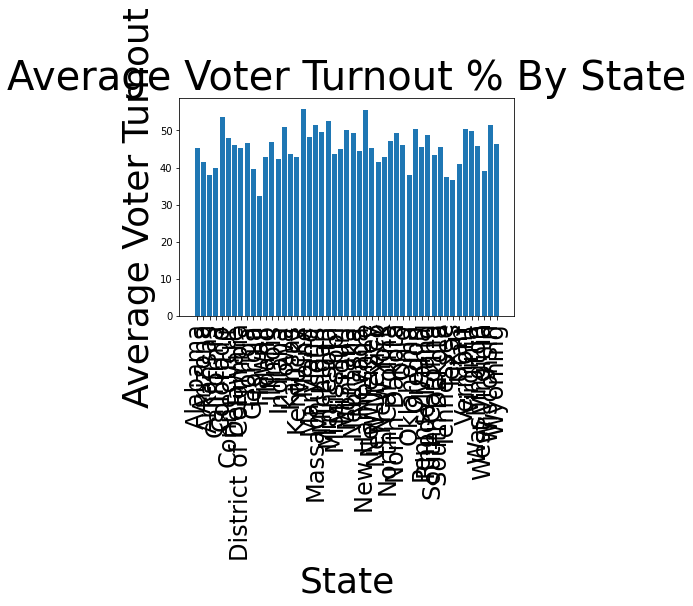

In [6]:
#Bar Graph

Avg_Turnout = State_Avg_Voter_Turnout_1["Avg_Turnout"]
State =  State_Avg_Voter_Turnout_1["State"]
plt.bar(State, Avg_Turnout)
plt.title('Average Voter Turnout % By State', fontsize=40)
plt.xlabel('State', fontsize=36)
plt.ylabel('Average Voter Turnout', fontsize=36)
plt.xticks(rotation=90, fontsize=24)
plt.rcParams["figure.figsize"] = [30, 20]
plt.savefig('Avg_Voter_State_2016.png')
plt.savefig("State_Avg_Voters_2016.png", dpi=25)

plt.show()

In [7]:
# 1. What is the overall average voter turnout for 2016 per state, and per (((county)))
County_Avg_Turnout = round((analysis_data_2016.groupby('Location')['Avg_Turnout'].mean() * 100), 2)
County_Avg_Turnout

County_Avg_Voter_Turnout = pd.DataFrame(County_Avg_Turnout)
County_Avg_Voter_Turnout_1 = County_Avg_Voter_Turnout.reset_index()

In [8]:
County_Avg_Voter_Turnout_1

,Location,Avg_Turnout
0,"Alabama, Autauga",45.21
1,"Alabama, Baldwin",45.86
2,"Alabama, Barbour",40.57
3,"Alabama, Bibb",39.05
4,"Alabama, Blount",44.51
...,...,...
2992,"Wyoming, Sweetwater",38.74
2993,"Wyoming, Teton",54.35
2994,"Wyoming, Uinta",40.95
2995,"Wyoming, Washakie",46.71


In [9]:
Sample_County = County_Avg_Voter_Turnout_1.sample(n = 50)
Sample_County


,Location,Avg_Turnout
409,"Georgia, Emanuel",35.08
522,"Idaho, Bannock",39.46
2787,"Virginia, Prince William",43.05
537,"Idaho, Clearwater",43.94
2209,"Pennsylvania, York",46.43
369,"Georgia, Brantley",34.22
1002,"Kentucky, Grant",38.37
839,"Iowa, Scott",50.09
665,"Illinois, Woodford",51.05
272,"Colorado, San Miguel",54.00


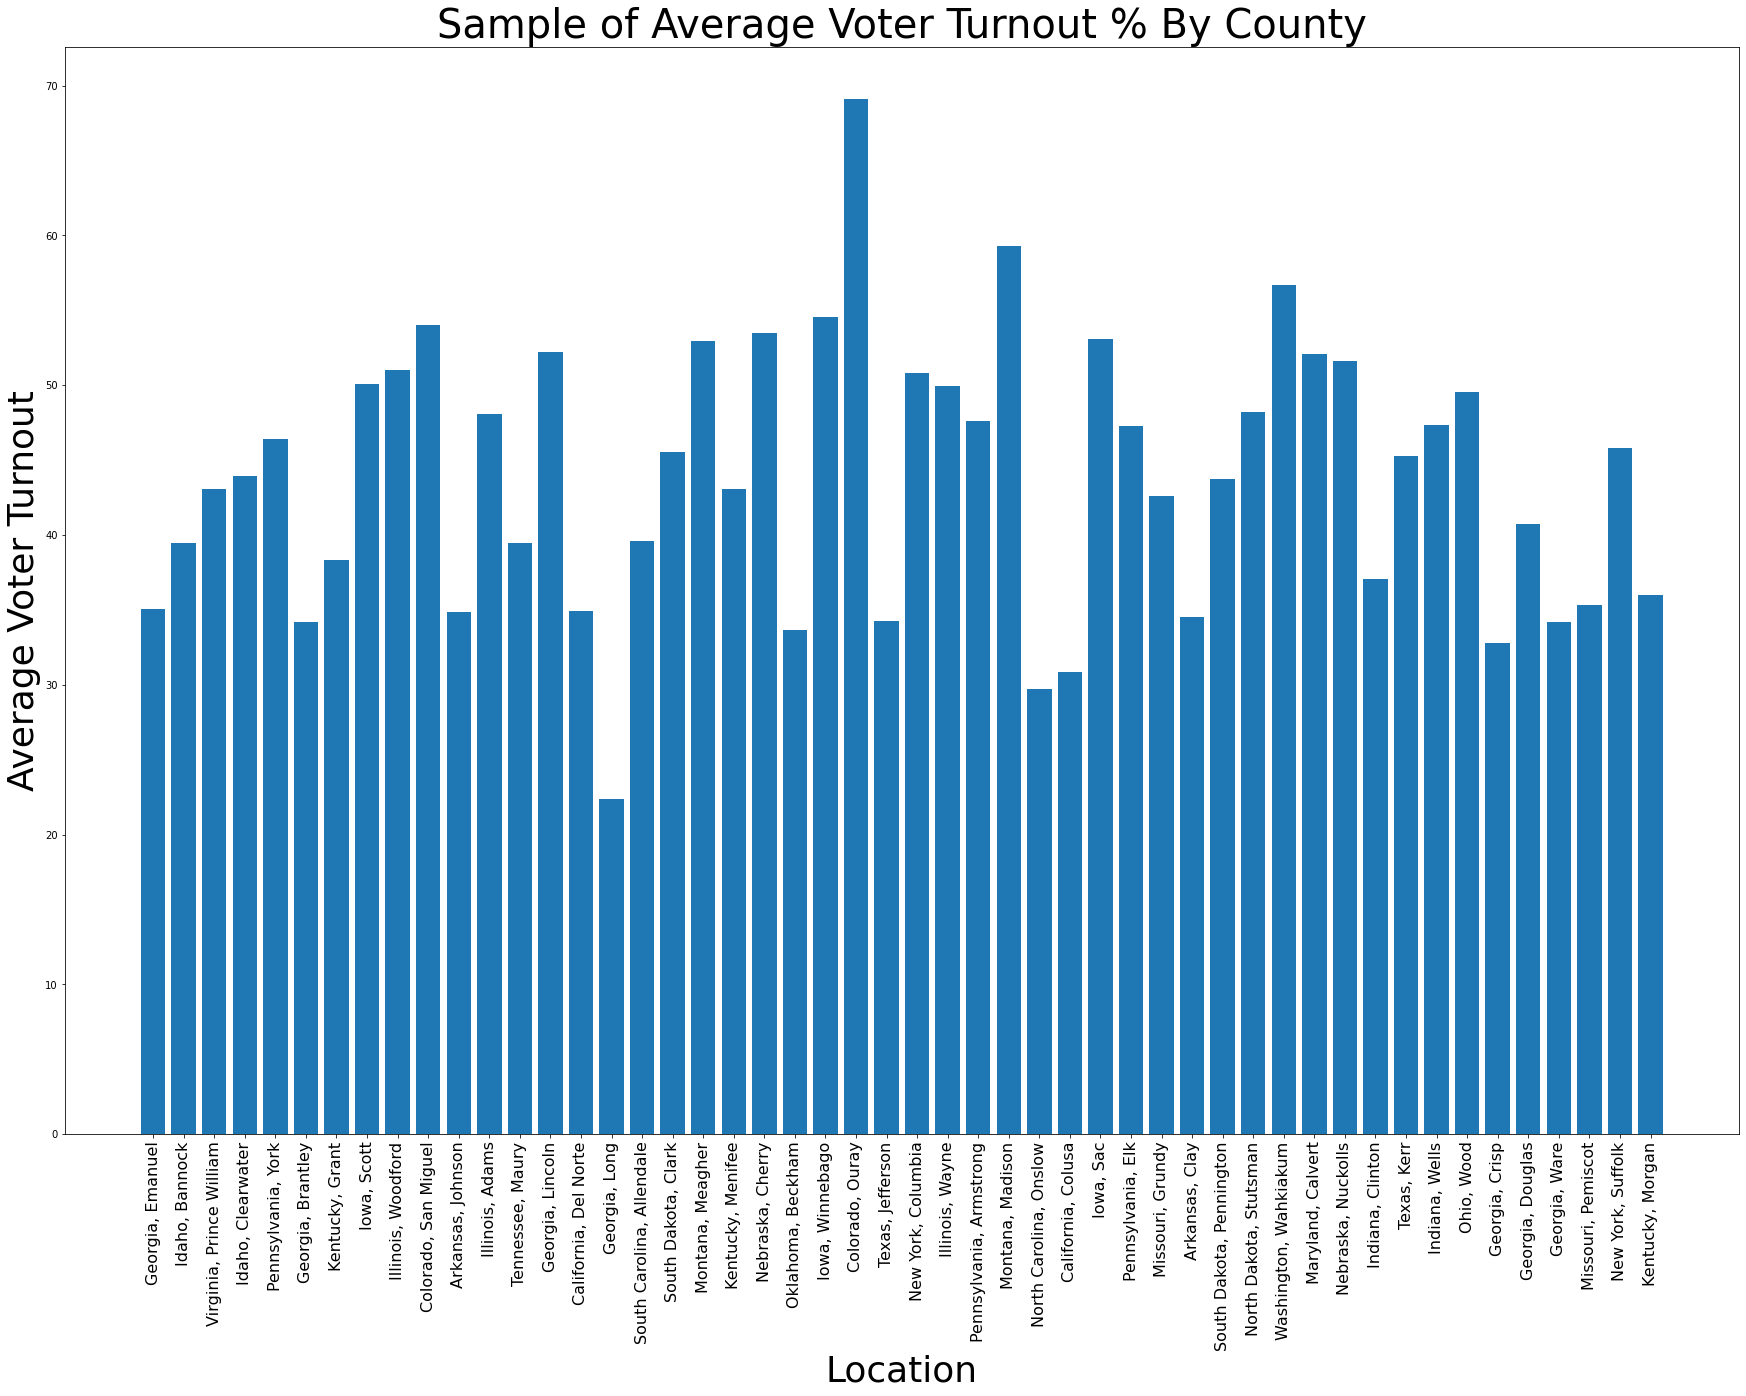

In [10]:
Avg_County_Turnout = Sample_County["Avg_Turnout"]
Location =  Sample_County["Location"]
plt.bar(Location, Avg_County_Turnout)
plt.title('Sample of Average Voter Turnout % By County', fontsize=40)
plt.xlabel('Location', fontsize=36)
plt.ylabel('Average Voter Turnout', fontsize=36)
plt.xticks(rotation=90, fontsize=16)
plt.rcParams["figure.figsize"] = [30, 20]
plt.savefig("County_Avg_Voters_2016.png", dpi=25)

plt.show()

In [11]:
Pop_County = County_Avg_Voter_Turnout_1['Avg_Turnout']
Sample_County = Sample_County["Avg_Turnout"]

stats.ttest_1samp(Sample_County, Pop_County.mean())

Ttest_1sampResult(statistic=-0.49747532928974186, pvalue=0.6210790335336014)

In [12]:


error_search = County_Avg_Voter_Turnout_1['Avg_Turnout'].max()
print(error_search)

86.24


In [13]:
#5. Are there any outliers?
county_outliers = County_Avg_Voter_Turnout_1['Avg_Turnout']

quartiles = county_outliers.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25], 2)
upperq = round(quartiles[0.75], 2)
iqr = round(upperq-lowerq, 2)

print(f"The lower quartile of county_outliers is: {lowerq}")
print(f"The upper quartile of county_outliers is: {upperq}")
print(f"The interquartile range of county_outliers is: {iqr}")
print(f"The the median of county_outliers is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print(county_outliers)

The lower quartile of county_outliers is: 39.6
The upper quartile of county_outliers is: 49.95
The interquartile range of county_outliers is: 10.35
The the median of county_outliers is: 44.68 
Values below 24.08 could be outliers.
Values above 65.47 could be outliers.
0       45.21
1       45.86
2       40.57
3       39.05
4       44.51
        ...  
2992    38.74
2993    54.35
2994    40.95
2995    46.71
2996    48.84
Name: Avg_Turnout, Length: 2997, dtype: float64


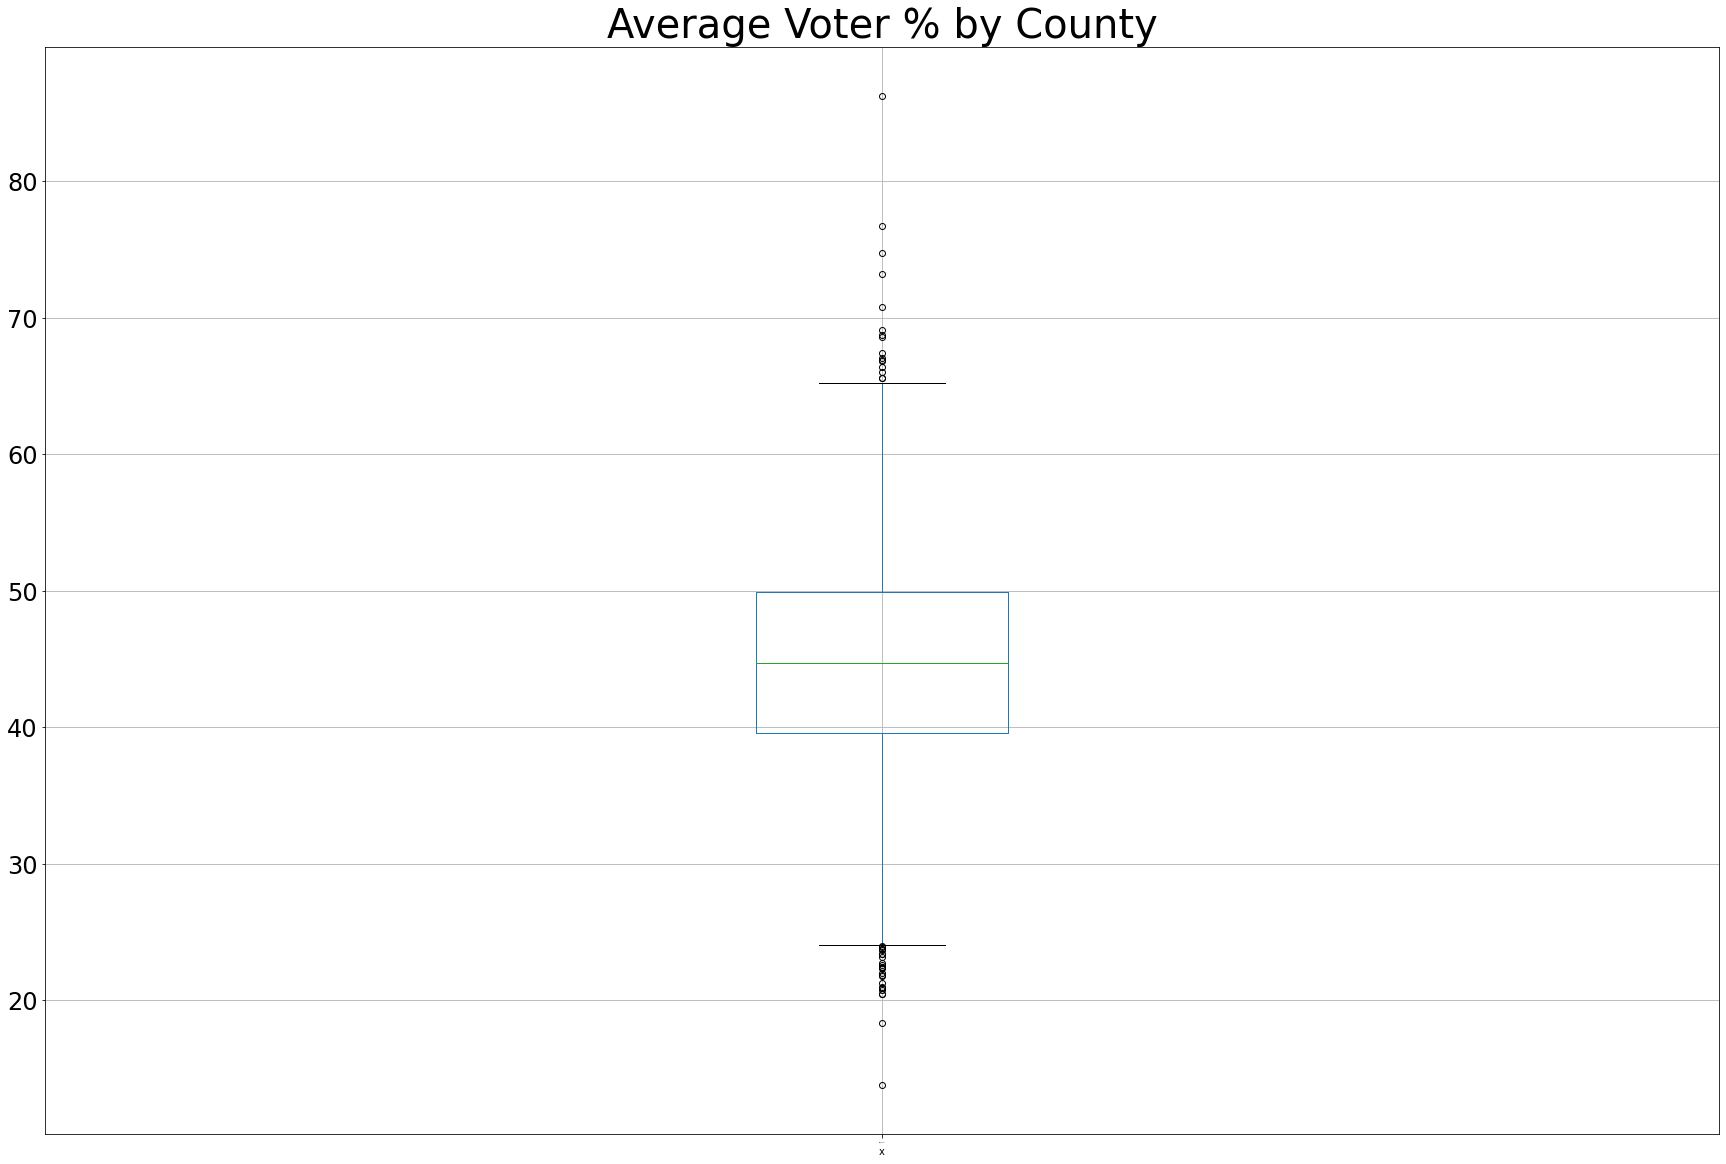

In [14]:
boxplot_2016 = County_Avg_Voter_Turnout_1.boxplot(column=['Avg_Turnout'], fontsize=15)

boxplot_2016.set_xlabel("x")
boxplot_2016.set_title("Average Voter % by County", fontsize=40)
boxplot_2016.tick_params(axis='y', labelsize=24)
boxplot_2016.tick_params(axis='x', labelsize=0)

boxplot_2016.figure.savefig("Boxplot_2016.png")


In [15]:
# 2. Which States have the highest / lowest average voter turnout?


state_voter_max = State_Avg_Voter_Turnout_1['State'].max()
State_voter_max_pct = State_Avg_Voter_Turnout_1['Avg_Turnout'].max()

state_voter_min = State_Avg_Voter_Turnout_1['State'].min()
State_voter_min_pct = State_Avg_Voter_Turnout_1['Avg_Turnout'].min()


print("The State with the highest average voter turnout for 2016 is " + str(state_voter_max) + " with " + str(State_voter_max_pct) + "% of the population voting")
print("The State with the lowest average voter turnout for 2016 is " + str(state_voter_min) + " with " + str(State_voter_min_pct) + "% of the population voting")




The State with the highest average voter turnout for 2016 is Wyoming with 55.81% of the population voting
The State with the lowest average voter turnout for 2016 is Alabama with 32.43% of the population voting


In [17]:
analysis_data_2016

,Location,State_Code_x,County,State,State_Code_y,Party,Candidate,Total_Votes,County_Pop_2016,Avg_Turnout
0,"Alabama, Autauga",AL,Autauga,Alabama,AL,democrat,Hillary Clinton,24973,55243.0,0.452057
1,"Alabama, Autauga",AL,Autauga,Alabama,AL,republican,Donald Trump,24973,55243.0,0.452057
2,"Alabama, Baldwin",AL,Baldwin,Alabama,AL,democrat,Hillary Clinton,95215,207601.0,0.458644
3,"Alabama, Baldwin",AL,Baldwin,Alabama,AL,republican,Donald Trump,95215,207601.0,0.458644
4,"Alabama, Barbour",AL,Barbour,Alabama,AL,democrat,Hillary Clinton,10469,25806.0,0.405681
...,...,...,...,...,...,...,...,...,...,...
5989,"Wyoming, Uinta",WY,Uinta,Wyoming,WY,republican,Donald Trump,8470,20682.0,0.409535
5990,"Wyoming, Washakie",WY,Washakie,Wyoming,WY,democrat,Hillary Clinton,3814,8165.0,0.467116
5991,"Wyoming, Washakie",WY,Washakie,Wyoming,WY,republican,Donald Trump,3814,8165.0,0.467116
5992,"Wyoming, Weston",WY,Weston,Wyoming,WY,democrat,Hillary Clinton,3526,7220.0,0.488366


In [37]:
# 3. voter turnout vs population


#drop location column to leave only states
analysis_data_2016_3 = analysis_data_2016_2.drop(columns=['Location'])
analysis_data_2016_3
##groupby state
analysis_data_2016_4 = analysis_data_2016_3.groupby('State_Code').sum()
analysis_data_2016_4
analysis_data_2016_4["state_pop"] = (analysis_data_2016.groupby("State_Code_y")['County_Pop_2016'].sum() / 2)
analysis_data_2016_4

##get percent of repub votes
analysis_data_2016_4["Pct_Repub_PCT_2016"] = (round(analysis_data_2016_4['2016_republican_votes'] / analysis_data_2016_4["state_pop"], 2))
##get per cent of dem votes
analysis_data_2016_4["Pct_Dem_PCT_2016"] = (round(analysis_data_2016_4['2016_democrat_votes'] / analysis_data_2016_4["state_pop"], 2))
##get total votes percent (1)
analysis_data_2016_4["Total_Votes_PCT_2016"] = analysis_data_2016_4['Total_Votes_2016'] / analysis_data_2016_4["state_pop"]
##get total votes percent (1)
analysis_data_2016_4["Prct_Not_Voting_2016"] = (round(((analysis_data_2016_4["state_pop"] / analysis_data_2016_4["state_pop"]) - analysis_data_2016_4["Total_Votes_PCT_2016"]), 2)) 
analysis_data_2016_4

analysis_data_2016_5 = analysis_data_2016_4[['Pct_Repub_PCT_2016', 'Pct_Dem_PCT_2016', "Prct_Not_Voting_2016", "Total_Votes_PCT_2016"]]
analysis_data_2016_5.head()


,Pct_Repub_PCT_2016,Pct_Dem_PCT_2016,Prct_Not_Voting_2016,Total_Votes_PCT_2016
State_Code,,,,
AL,0.28,0.15,0.56,0.444571
AR,0.23,0.13,0.62,0.381262
AZ,0.18,0.17,0.62,0.378725
CA,0.11,0.22,0.64,0.362079
CO,0.22,0.24,0.50,0.501916


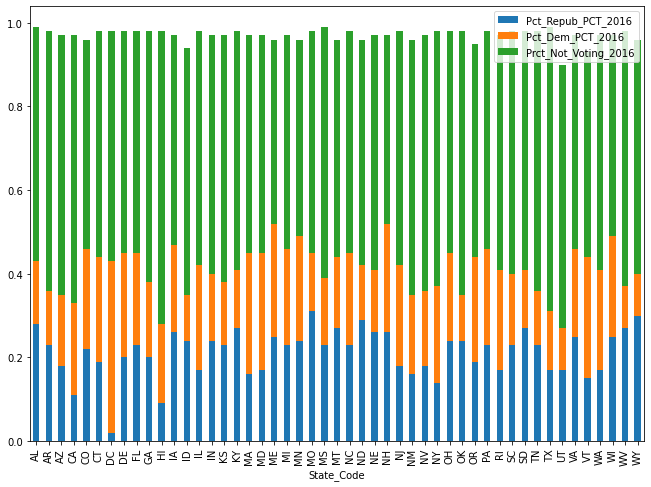

In [26]:
# 3. voter turnout vs population
#Stacked Bar Graph

analysis_data_2016_3
axis = analysis_data_2016_5[['Pct_Repub_PCT_2016', 'Pct_Dem_PCT_2016', "Prct_Not_Voting_2016"]].plot(kind="bar", stacked=True, figsize=(30, 60))
fig = axis.get_figure()
fig.set_size_inches(11,8)
fig.savefig("voter_turnout_vs_population_2016.png", figsize=(8, 6))


In [38]:
#4. What is the avg population of the county compared to the voters on election day

sample_county_2 = County_Avg_Voter_Turnout_1.sample(n = 20)


sample_county_pop = sample_county_2.merge(analysis_data_2016[['County_Pop_2016', 'Location']], on="Location", how='left')

sample_county_pop_2 = sample_county_pop.drop_duplicates()

In [44]:
sample_county_pop_2['Total'] = 100
sample_county_pop_2

<ipython-input-44-f330384f93bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_county_pop_2['Total'] = 100


,Location,Avg_Turnout,County_Pop_2016,Total
0,"Georgia, Jasper",43.91,13767.0,100
2,"Ohio, Allen",44.29,103613.0,100
4,"New Mexico, Santa Fe",48.02,148758.0,100
6,"Alabama, Cleburne",44.40,14848.0,100
8,"Texas, Brazoria",34.31,353155.0,100
10,"Tennessee, Sullivan",39.88,156182.0,100
12,"Virginia, Wythe",46.15,28912.0,100
14,"Iowa, Monroe",49.32,7836.0,100
16,"Colorado, Kit Carson",48.54,7626.0,100
18,"Nebraska, Pierce",50.81,7144.0,100


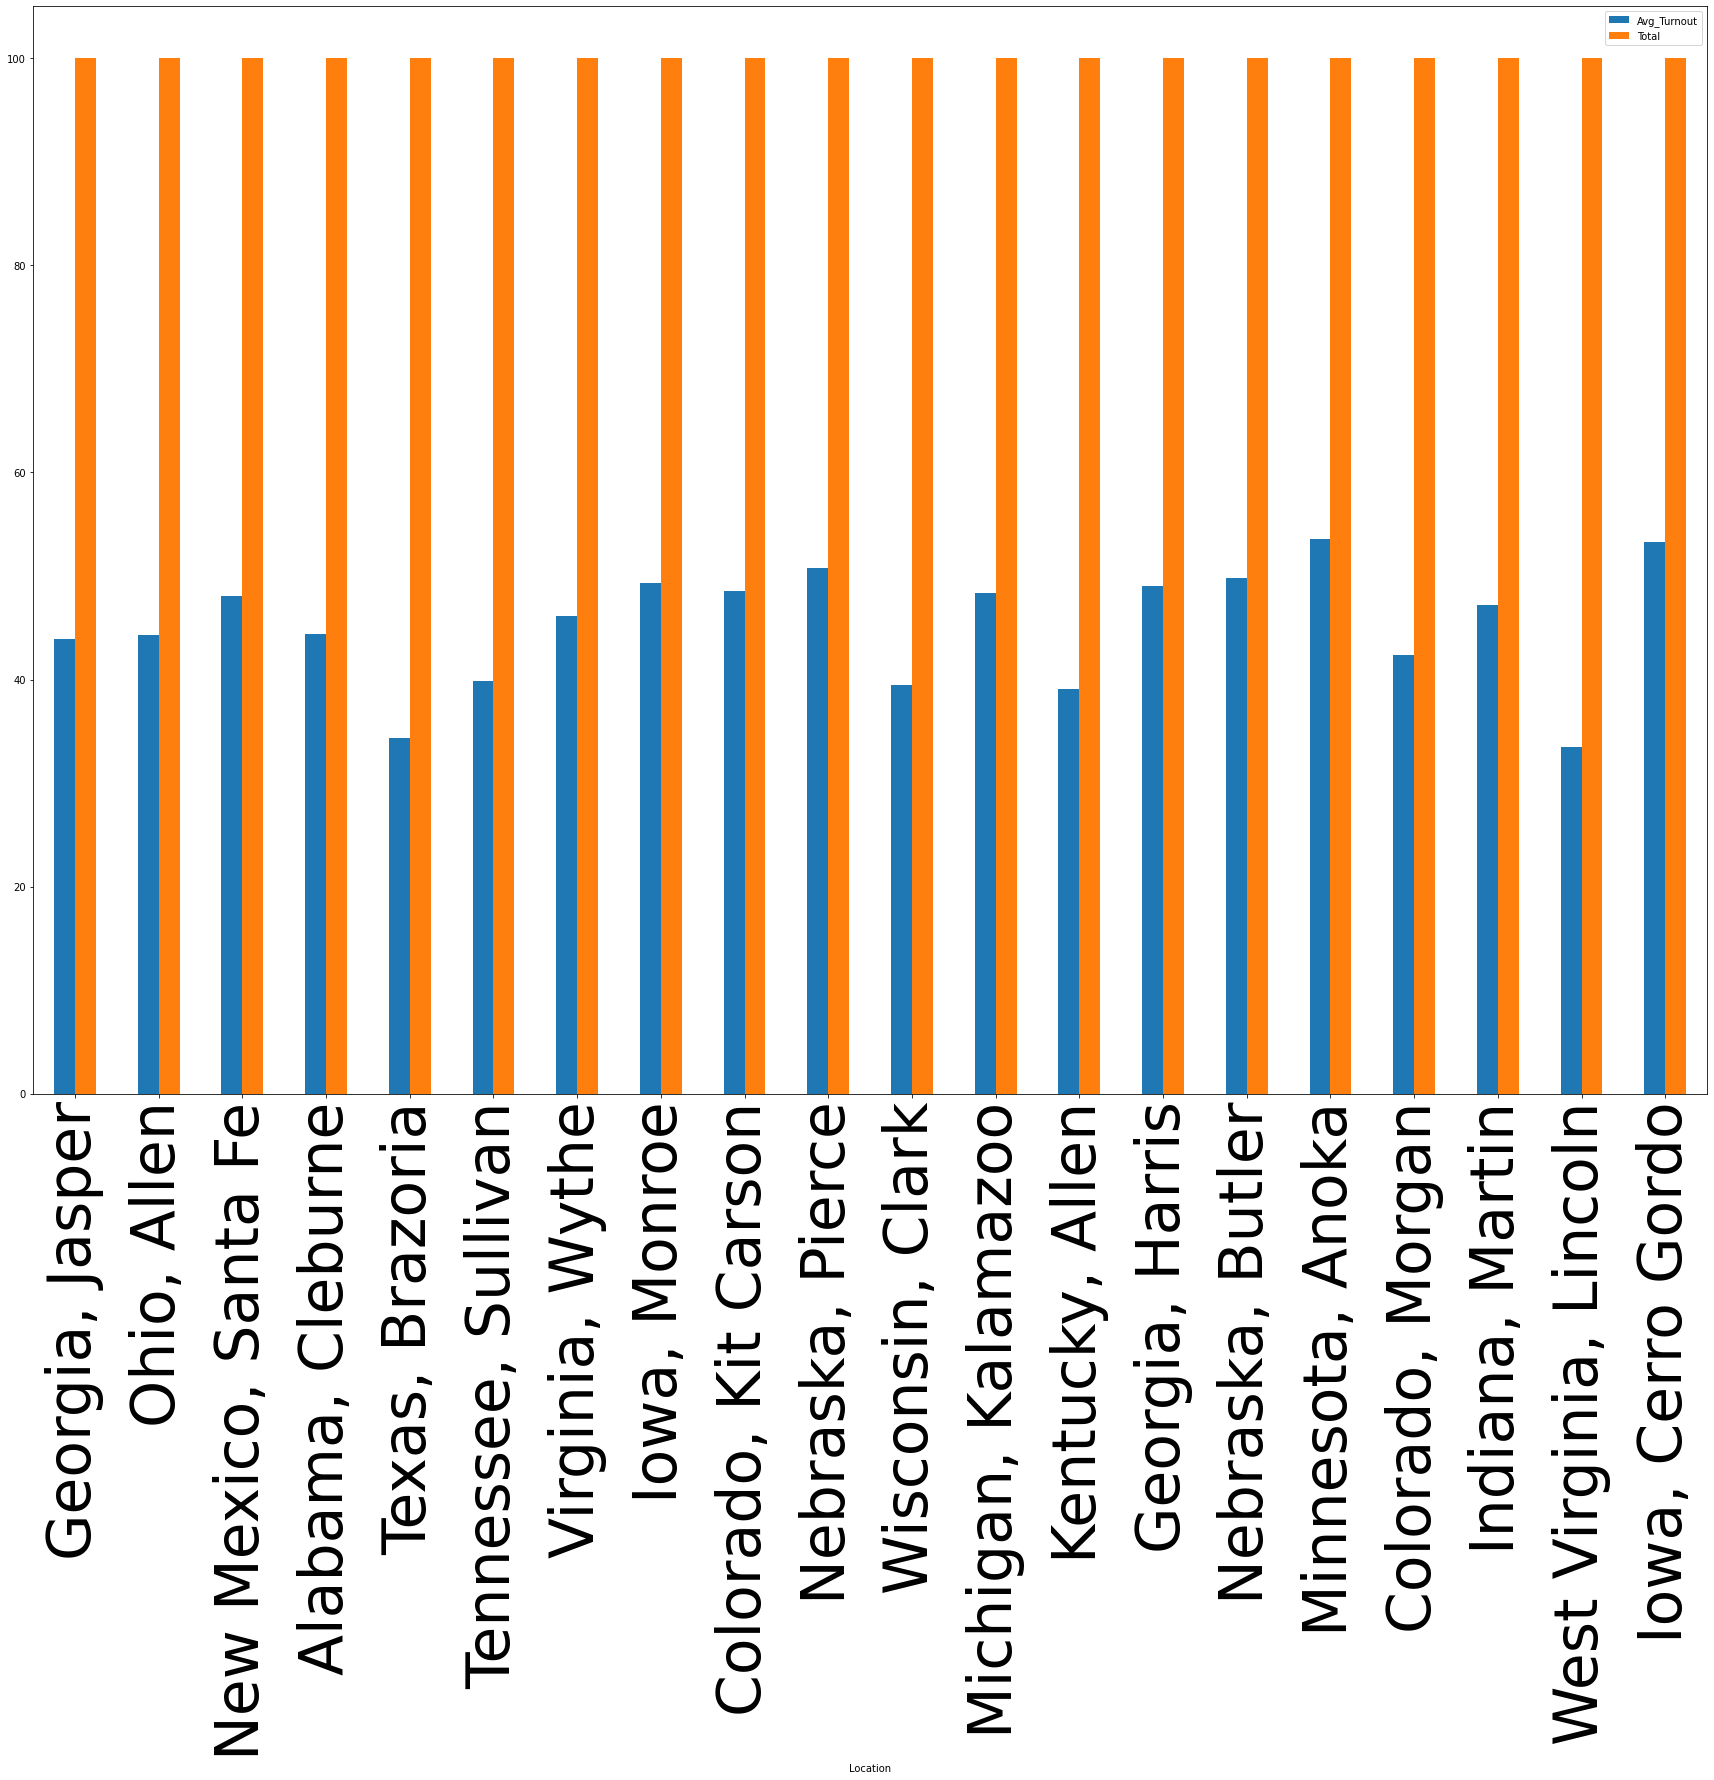

In [50]:
#4. What is the avg population of the county compared to the voters on election day

sample_county_pop_2.plot(x="Location", y=["Avg_Turnout", "Total"], kind="bar")
plt.xticks(fontsize=60)

plt.savefig("Avg_Voters_vs_Pop_Sample_County_2016.png", dpi=250)
plt.show()


In [47]:
analysis_data_2016_5_1 = analysis_data_2016_5.reset_index()

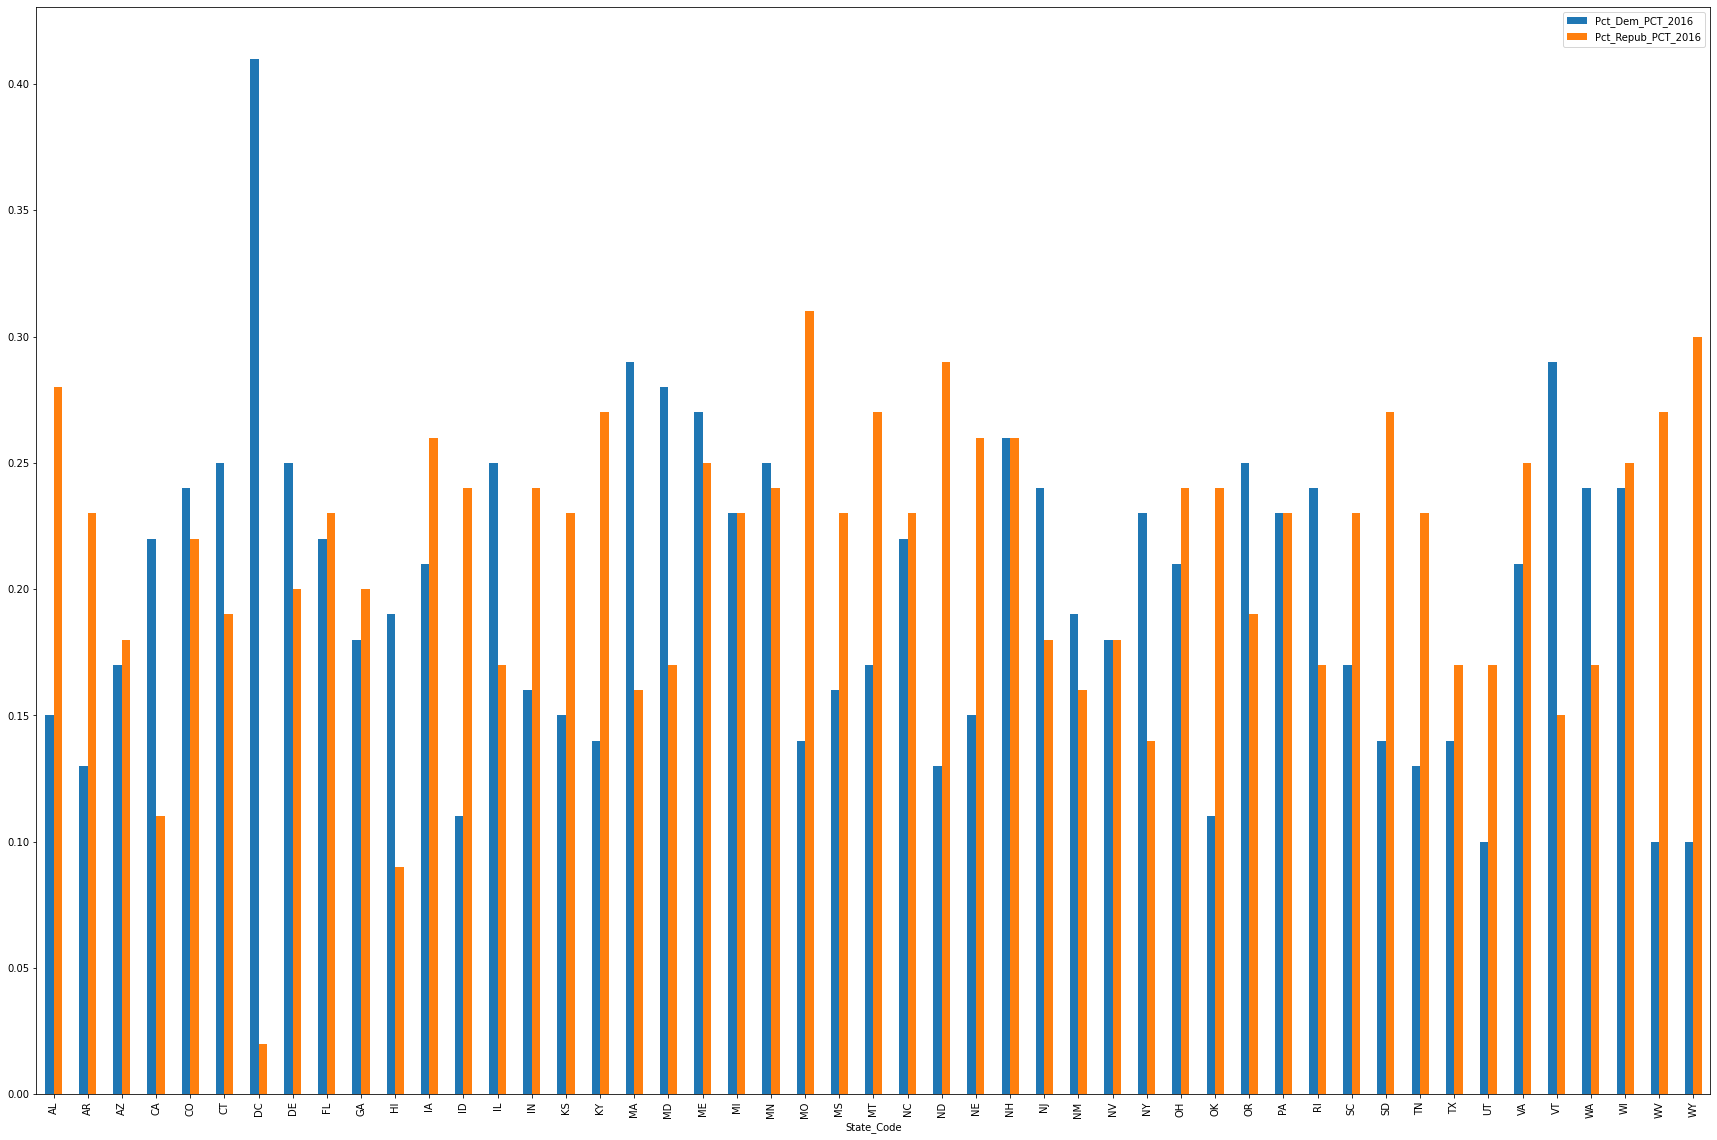

In [48]:
#5. What is the voter turnout based on political party per state, county


analysis_data_2016_5_1.plot(x="State_Code", y=["Pct_Dem_PCT_2016", "Pct_Repub_PCT_2016"], kind="bar")
plt.savefig("Voters_Political_Parties_2016.png")
plt.show()


